During the signature analysis, the authors state that “the occurrence of words was proportional to the number of associated variants (3: 50+ variants, 2: 10-49 variants, 1: 1-9 variants).” I wonder whether alternative categorizations (e.g., more granular categories) or a continuous scale (without categorization) were considered, and if not, why. The current grouping appears somewhat arbitrary – for example, 9 variants (1 word) are much closer to 10 variants (2 words) than 10 variants (2 words) are to 49 variants (also 2 words). A more refined classification or a continuous approach might better reflect the underlying distribution of variant associations.

In [6]:
import os
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib
import topicwizard
import seaborn as sns
import matplotlib.pyplot as plt

TFIDF = True

SCOPE = "all_outcomes_all_genes"

root = "."
data_dir = os.path.abspath(os.path.join(root, "..", "..", "data"))
results_dir = os.path.abspath(os.path.join(root, "..", "..", "results", "topicmodeling", SCOPE))
if not os.path.exists(results_dir):
    os.makedirs(results_dir, exist_ok=True)

df = pd.read_csv(os.path.join(data_dir, "ml_datasets_matrix", "df_{0}.csv".format(SCOPE)))

print(df.shape)

prot_names_df = pd.read_csv(os.path.join(data_dir, "other", "pgkb_gene_uniprot_mapping.tsv"), sep="\t")

prot2gene = {}
for v in prot_names_df.values:
    prot2gene[v[2]] = v[1]

df.rename(columns=prot2gene, inplace=True)

inchikeys = list(df["Unnamed: 0"])
df = df.drop(columns=["Unnamed: 0"], inplace=False)
df.index = inchikeys

# Create documents

# 1-9: weight 1
# 10-49: weight 2
# 50+: weight 3
documents_list = []
cols = list(df.columns)
kept_idxs = []
for j, v in enumerate(df.values):
    document = []
    for i, x in enumerate(v):
        if x == 0:
            continue
        elif x < 10:
            n = 1
        elif x < 50:
            n = 2
        else:
            n = 3
        document += [cols[i]] * n
    if len(set(document)) < 5:
        continue
    kept_idxs.append(j)
    documents_list += [" ".join(document)]

(753, 1245)


In [10]:
import collections

occurrence_counts = collections.defaultdict(int)
for v in df.values:
    for x in v:
        occurrence_counts[int(x)] += 1

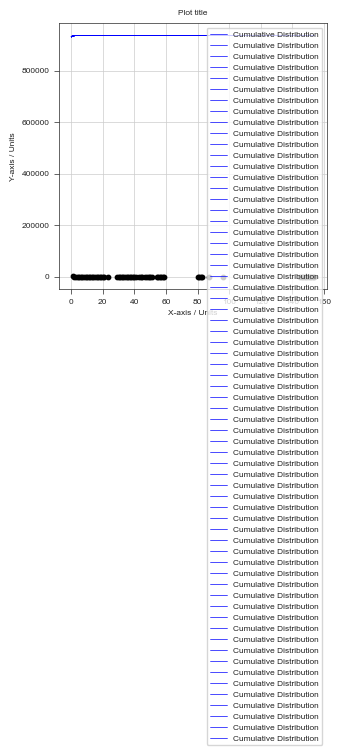

In [ ]:
import stylia

fig, axs = stylia.create_figure(1, 1)

ax = axs.next()
for k, v in occurrence_counts.items():
    if k == 0:
        continue
    ax.scatter([k], [v], color="black")

ax = axs.next()

